# Reconstructing a signal from repeated under sampled signals

Suppose I have a signal with sharp rise time but the sampler can only sample at one tenth of the required sampling time required to reconstruct the signal. This is the classical digital sampling oscilloscope problem, nothing new.

The signal has a duration of approximately one second. 
For the purpose of this example the signal is sampled at 100 Hz. 
The sampled signal is required at  1 ms intervals, hence the signal must have a sample length of 1.001 second, repeatedly.

In this present investigation we are not concerned about the absolute amplitude, but rather the shape of the curve.


In [1]:
import sys
import array
import random
import numpy as np
import scipy.signal

import matplotlib
import matplotlib.pyplot as plt

# import pandas as pd
# # pd.set_option('expand_frame_repr', False)
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('precision',5)
# pd.set_option('display.max_colwidth',100)

np.set_printoptions(suppress=True)# supress printing of small values
np.set_printoptions(linewidth=200)
np.set_printoptions(precision=6)

%matplotlib inline

In [26]:
# to create the signals
smpPeriod = 0.01
smpWidth = 0.001
totTme = 100
sigTme = 1
repeats = totTme / sigTme

#create the sampling signal
idx = list(range(0,int(totTme/smpWidth)))
aidx = np.asarray(idx)
tme = aidx * smpWidth
sampler = aidx % int(smpPeriod/smpWidth) == 0

# create the sampled signal in hires
# first do base signal
tms = tme[0:1001]
sigBase = np.cos(2 * 2 * np.pi * tms)* np.exp(-np.pi * tms)
sigBase[0:3] = np.asarray([0,0.333,0.666])
sigBase[-200:] = 0
# then repeat and truncate to length
sigT = sigBase
for i in range(int(totTme/sigTme)+20): 
    sigT = np.insert(sigT, 0, sigBase)
sigT = sigT[0:sampler.shape[0]]
# sample the signal to get undersampled signal
sigU = sigT * sampler

In [27]:
# to reconstruct the signal

sigR = np.zeros_like(sigBase)
lenR = sigR.shape[0]
for i in range(totTme//sigTme-1):
    # chop into pieces and add together
    sigR += sigU[i*lenR:(i+1)*lenR ]
sigR *= (sigTme*smpPeriod)/(totTme*smpWidth)

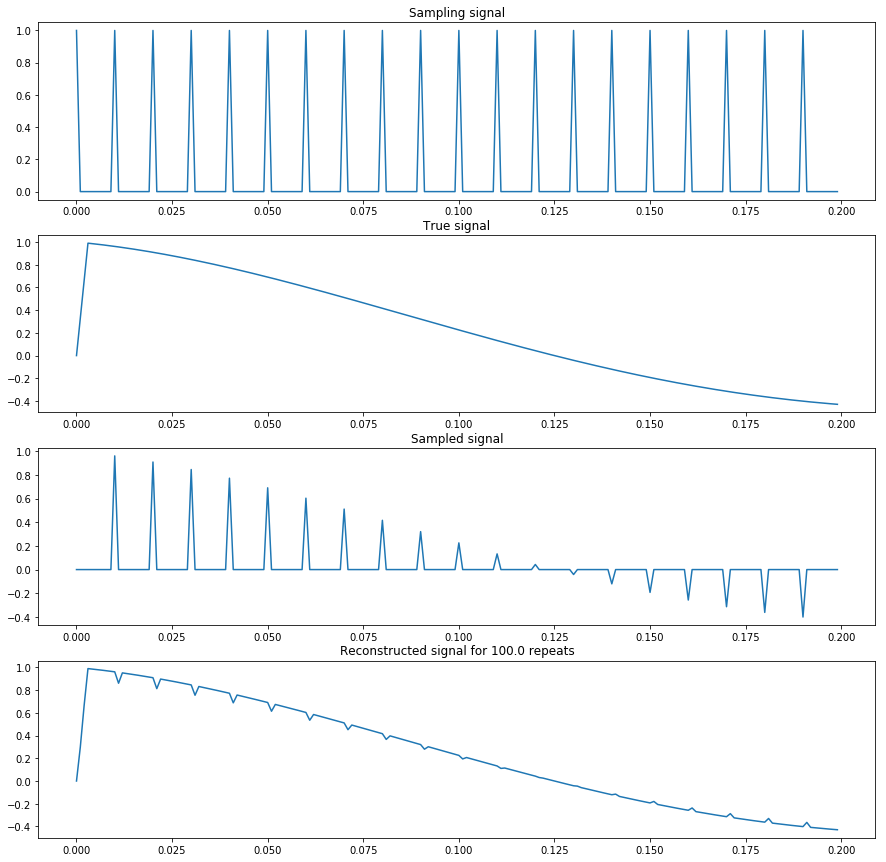

In [28]:
# to plot the signals
offset = 0
width = 200
slce = np.s_[offset:offset+width]

fig, axes = plt.subplots(nrows=4, ncols=1);
plt.gcf().set_size_inches(15, 15);

axes[0].plot(tme[slce],sampler[slce]);axes[0].set(title='Sampling signal');
axes[1].plot(tme[slce],sigT[slce]);axes[1].set(title='True signal');
axes[2].plot(tme[slce],sigU[slce]);axes[2].set(title='Sampled signal');
axes[3].plot(tms[slce],sigR[slce]);axes[3].set(title=f'Reconstructed signal for {repeats} repeats');


Some reason net yet investigated there is always a series of dips in the reconstructed signal. 
The more samples there are the more accurate the signal reconstruction becomes.  